<a href="https://colab.research.google.com/github/Vignesh666666/Avian-Species-Detection/blob/main/Bird_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Required Libraries**

In [ ]:
import os
import json
import cv2
import librosa
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from warnings import filterwarnings

filterwarnings(action='ignore')

### **Data Collection**

In [ ]:
# Download 'Sound Of 114 Species Of Birds Till 2022' dataset from Kaggle
# Dataset URL = https://www.kaggle.com/datasets/soumendraprasad/sound-of-114-species-of-birds-till-2022?select=Birds+Voice.csv

!kaggle datasets download -d soumendraprasad/sound-of-114-species-of-birds-till-2022

Dataset URL: https://www.kaggle.com/datasets/soumendraprasad/sound-of-114-species-of-birds-till-2022
License(s): CC0-1.0
100% 2.06G/2.06G [00:57<00:00, 43.5MB/s]
100% 2.06G/2.06G [00:57<00:00, 38.6MB/s]


In [ ]:
# Unzip the dataset

!unzip sound-of-114-species-of-birds-till-2022.zip

Archive:  sound-of-114-species-of-birds-till-2022.zip
  inflating: Birds Voice.csv         
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan10.mp3  
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan11.mp3  
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan12.mp3  
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan13.mp3  
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan14.mp3  
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan15.mp3  
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan16.mp3  
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan17.mp3  
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan18.mp3  
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan19.mp3  
  inflating: Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan2.mp3  
  inflating: Voice

### **Sample Audio Checking**

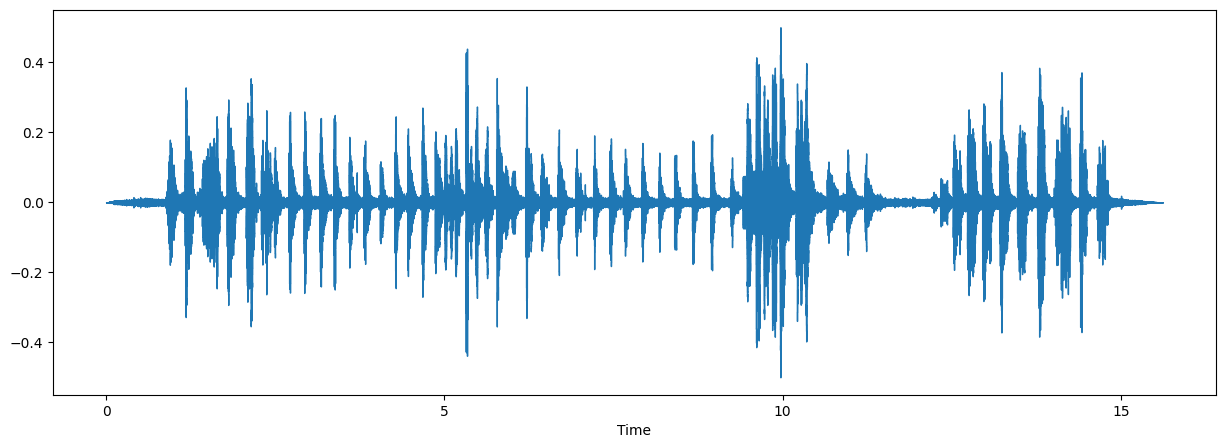

In [ ]:
# Sample Audio Checking

# Set Plot Size
plt.figure(figsize=(15,5))

# Load Audio File to extract Audio Data and Sample Rate
audio_data, sample_rate = librosa.load(path='/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan12.mp3')
librosa.display.waveshow(y=audio_data, sr=sample_rate)

# View and Hear Audio File
IPython.display.Audio(data='/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan12.mp3')

In [ ]:
# Audio will be automatically converted to Mono Channel [1-Dimentional Signal] Data
audio_data

array([ 8.6401997e-12, -1.2732926e-11, -1.8189894e-12, ...,
        2.2737368e-13,  3.9790393e-13, -8.5265128e-14], dtype=float32)

In [ ]:
# Audio will be automatically resampled to the rate of 22050Hz (default sr=22050)
sample_rate

22050

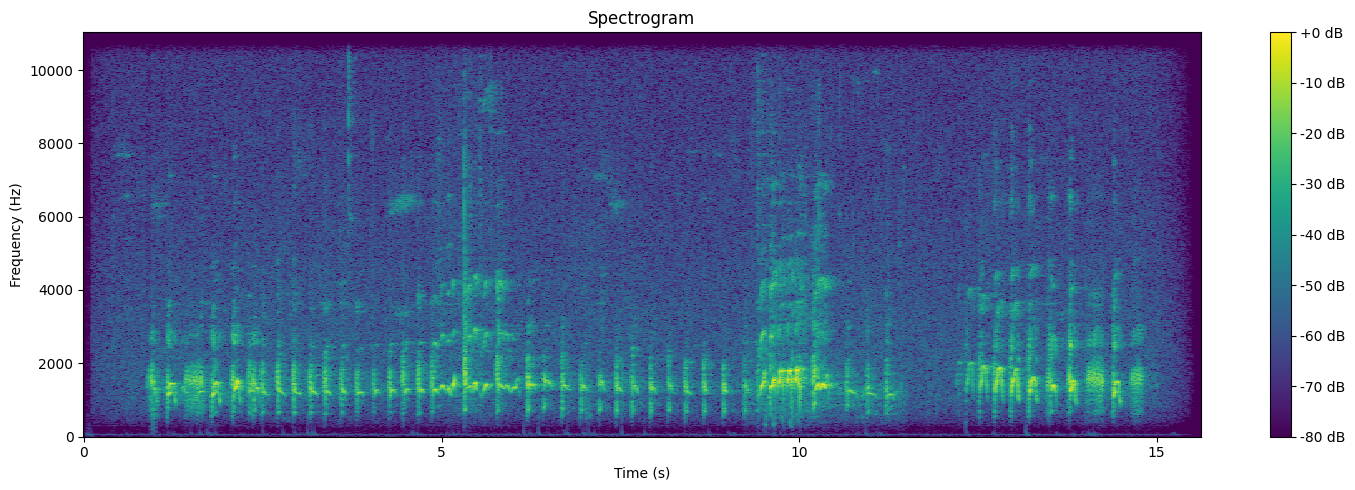

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
stft = librosa.stft(audio_data)
stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

# Set up the plot for the Spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(stft_db, sr=sample_rate, x_axis='time', y_axis='hz', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

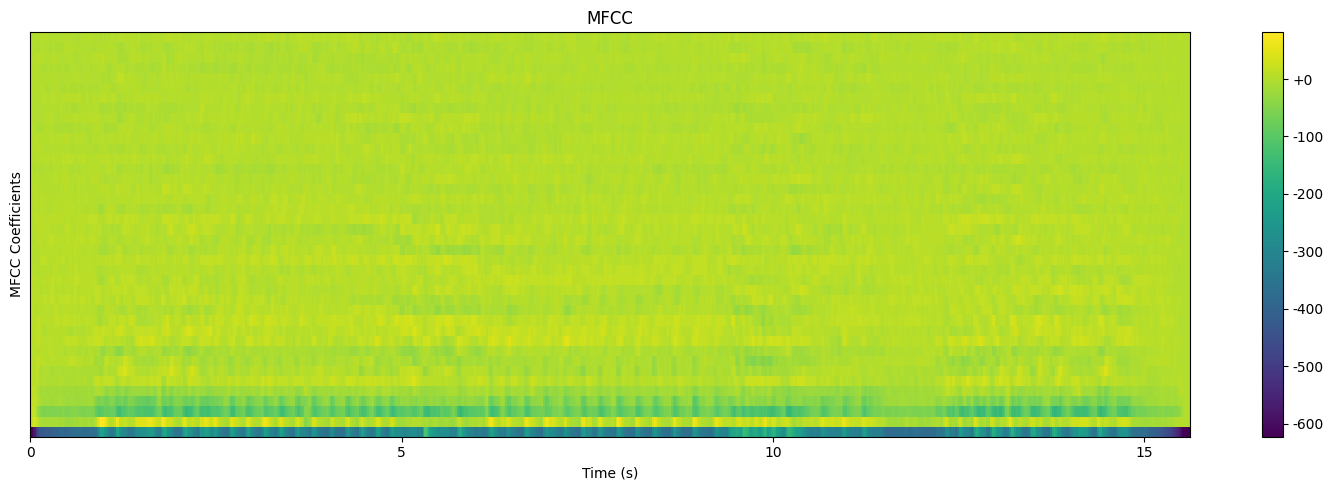

In [ ]:
import librosa.display

# Extract MFCC Features from the Audio Data
mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)

# Plot the MFCCs as a Heatmap
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs_features, sr=sample_rate, x_axis='time', cmap='viridis')
plt.colorbar(format='%+2.0f')
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

**Mel-Frequency Cepstral Coefficients (MFCC)**

*MFCC help to extract the features from audio based on frequency and time charecteristics. This features will help in classification.*

- It summarize the frequency distribution across window size.

- So it analyse `frequency & time charecteristics` of the sound.

- This audio representations help to identify the features for classification.


In [ ]:
# Sample Audio Checkingmfcc
mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)

Default n_mfcc = 20 & we put n_mfcc = 40

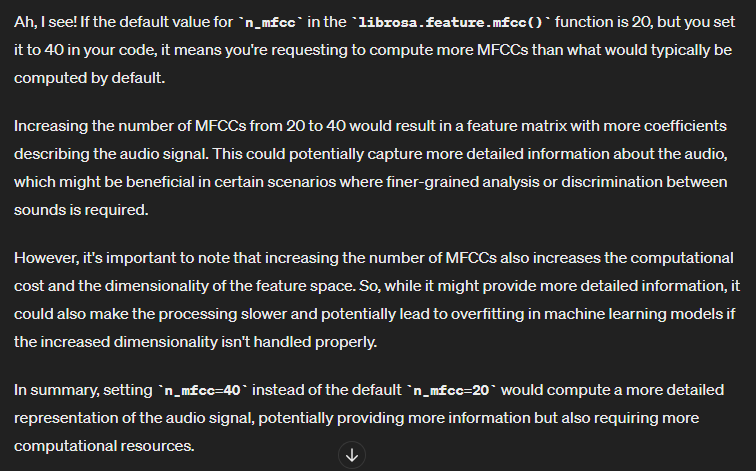

In [ ]:
# Sample Audio Checking
mfccs_features, mfccs_features.shape

(array([[-6.2250488e+02, -6.0999121e+02, -5.7499744e+02, ...,
         -6.2250488e+02, -6.2250488e+02, -6.2250488e+02],
        [ 0.0000000e+00,  1.6979614e+01,  4.1984943e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  1.5081097e+01,  2.0330696e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [ 0.0000000e+00, -7.2472107e-01,  3.1355238e-01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -9.6145791e-01, -1.4942675e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -1.1581572e+00, -1.6853914e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32),
 (40, 673))

which contains Mel-Frequency Cepstral Coefficients (MFCCs) computed from audio data.
The shape `(40, 673)` indicates that
- 40 rows (representing the 40 MFCC features)
- 673 columns (representing different frames or segments of the audio signal).

In [ ]:
# Sample Audio Checking
np.mean(mfccs_features, axis=1)     # axis=1 means row wise mean calculation - shape=(40,0)  &  axis=0 means column wise mean caculation - shape=(673,)

array([-3.0988004e+02,  1.0401821e+01, -9.0290489e+01, -4.4553440e+01,
       -1.8831221e+01,  7.9951978e+00, -1.9813392e+00, -6.6336718e+00,
       -7.9205399e+00,  1.2260887e+01,  1.1192107e+01,  1.1200222e+01,
       -3.1864762e-01,  3.7352815e+00,  5.5541921e+00,  6.4173203e+00,
        4.7119589e+00,  9.6746712e+00, -4.9130853e-02,  4.7118936e+00,
        3.7892053e+00,  8.2409830e+00,  1.1635526e+00,  4.1349077e+00,
        9.1222793e-01,  2.1938603e+00, -1.7673434e+00,  3.5073230e+00,
       -4.5820805e-01,  2.3610866e+00, -5.3835887e-01,  2.1143441e+00,
       -2.3396833e+00,  2.3190193e+00, -1.8095652e+00,  1.0630903e+00,
       -2.8051739e+00, -1.6753897e-01, -1.6882221e+00,  1.8219043e+00],
      dtype=float32)

In [ ]:
np.mean(mfccs_features, axis=1).shape

(40,)

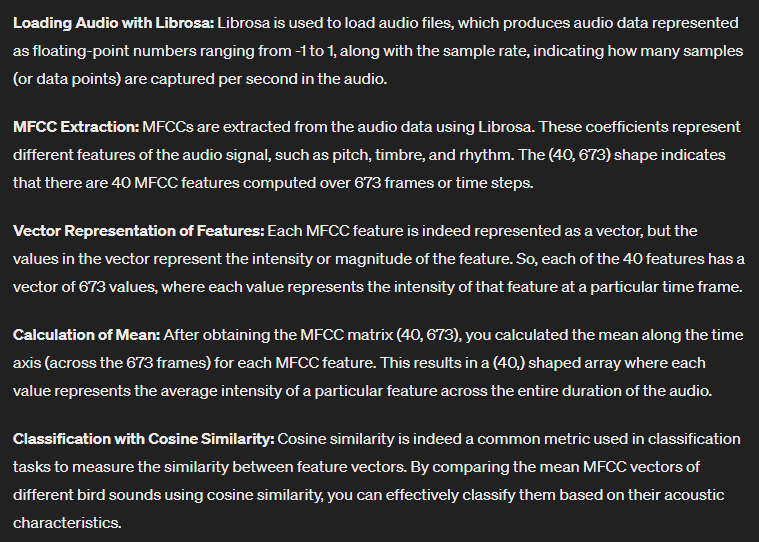

### **Data Preprocessing**

In [ ]:
# Convert the mp3 Audio into Tensors

def audio_to_tensors(audio_file):
    # Extract the Signal and Sample_Rate from Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    return mfccs_tensors

In [ ]:
# Sample Audio
audio_sample = '/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan10.mp3'
audio_to_tensors(audio_sample)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-302.73083   ,   70.47813   ,   13.989463  ,   28.275862  ,
          9.768283  ,    7.4185357 ,    3.663607  ,   12.622561  ,
          0.9152409 ,    3.15177   ,    4.5321455 ,    6.7180853 ,
         -2.076896  ,    5.5894322 ,    3.0978475 ,    1.8796209 ,
         -0.49635005,    6.4944406 ,    2.0897276 ,    4.146482  ,
          2.351528  ,    7.5341434 ,    0.63787776,    5.8428    ,
          4.5193014 ,    5.587803  ,    1.6145756 ,    6.687456  ,
          2.1035836 ,    4.2177606 ,    2.5508912 ,    4.631444  ,
          0.40562922,    4.092282  ,    1.5406473 ,    3.7211802 ,
          0.5173263 ,    3.6272905 ,    0.56133217,    3.1007855 ],
      dtype=float32)>

In [ ]:
# Extract the Features from Audio Files

# Audio Directory Path
directory = '/content/Voice of Birds/Voice of Birds'

extracted_features = []

total_files = sum(len(files) for _, _, files in os.walk(directory))

with tqdm(total=total_files, desc='Processing files') as pbar:

  for target_class in os.listdir(directory):

      target_class_path = os.path.join(directory, target_class)

      for audio_file in os.listdir(target_class_path):

          audio_path = os.path.join(directory, target_class, audio_file)

          features = audio_to_tensors(audio_path)

          extracted_features.append([features, target_class])

          pbar.update(1)


Processing files:  89%|████████▊ | 1913/2161 [06:26<00:55,  4.45it/s]

In [ ]:
extracted_features[0]

In [ ]:
# Creating DataFrame from Extracted Features with Class Labels

features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
features_df

In [ ]:
# Encoding Class Labels using LabelEncoder

target_encoding = LabelEncoder().fit_transform(features_df['class'])
target_encoding

In [ ]:
# Adding Encoded Class Labels Column to DataFrame

features_df['target'] = target_encoding.tolist()
features_df

In [ ]:
# Creating a Dictionary based on Class and Target columns for Future Prediction

prediction_dict = features_df.set_index('target')['class'].to_dict()
prediction_dict

In [ ]:
# Save to JSON File

with open(file='/content/prediction.json', mode='w') as f:
    json.dump(prediction_dict, f)

In [ ]:
# Read the Prediction_Dictionary File

with open(file='/content/prediction.json', mode='r') as f:
    prediction_dict = json.load(f)
prediction_dict

In [ ]:
# Converting Features into List
features = features_df['features'].tolist()
features

In [ ]:
# Converting Targets into Lists
target = features_df['target'].tolist()
print(target)

[51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 101, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 54, 54, 54, 54, 54, 54, 54, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 103, 103, 103, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [ ]:
# Converting Features and Targets to TensorFlow Tensors
features_tensor = tf.convert_to_tensor(features)
target_tensor = tf.convert_to_tensor(target)

In [ ]:
features_tensor

<tf.Tensor: shape=(2161, 40), dtype=float32, numpy=
array([[-1.0874533e+02,  6.1410446e+01, -4.1732498e+01, ...,
         1.2737772e+00, -1.9706695e+00,  3.7218328e+00],
       [-1.0874533e+02,  6.1410446e+01, -4.1732498e+01, ...,
         1.2737772e+00, -1.9706695e+00,  3.7218328e+00],
       [-2.9481320e+02,  2.2626076e+01, -7.3736687e+01, ...,
        -1.1191400e+01,  3.9608667e+00,  1.2213436e+01],
       ...,
       [-2.4684709e+02,  6.5035538e+01, -5.4013016e+01, ...,
         1.3487214e+00, -4.6793089e+00, -2.4487178e+00],
       [-2.4207765e+02,  3.0689436e+01, -1.8755779e+01, ...,
         4.2529550e+00,  1.6084385e+00, -8.1269634e-01],
       [-1.9411530e+02,  1.1034767e+02,  1.8600283e+00, ...,
         4.6125302e+00,  3.8899414e-02,  2.8593314e+00]], dtype=float32)>

In [ ]:
target_tensor

<tf.Tensor: shape=(2161,), dtype=int32, numpy=array([51, 51, 51, ...,  6,  6,  6], dtype=int32)>

In [ ]:
# Creating TensorFlow Dataset from Tensors
dataset = tf.data.Dataset.from_tensor_slices((features_tensor, target_tensor))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(40,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
# Split the dataset into batches
batch_size = 32
dataset = dataset.batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Length of Batched Potato Dataset
len(dataset)

68

In [ ]:
# Maximum Number of Images Count
68*32

2176

In [ ]:
# No of images in Last Badge
2176-2161

15

In [ ]:
# Define a Function process to Split Dataset into Training(80%), Validation(10%) and Testing(10%) Sets

def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)
    train_batch_count = int(dataset_batch_count * train_size)
    validation_test_batch_count = int(dataset_batch_count * validation_size)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)

    train_ds = dataset.take(train_batch_count)
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)

    return train_ds, validation_ds, test_ds

In [ ]:
# Apply the Function in Potato Dataset
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(54, 6, 8)

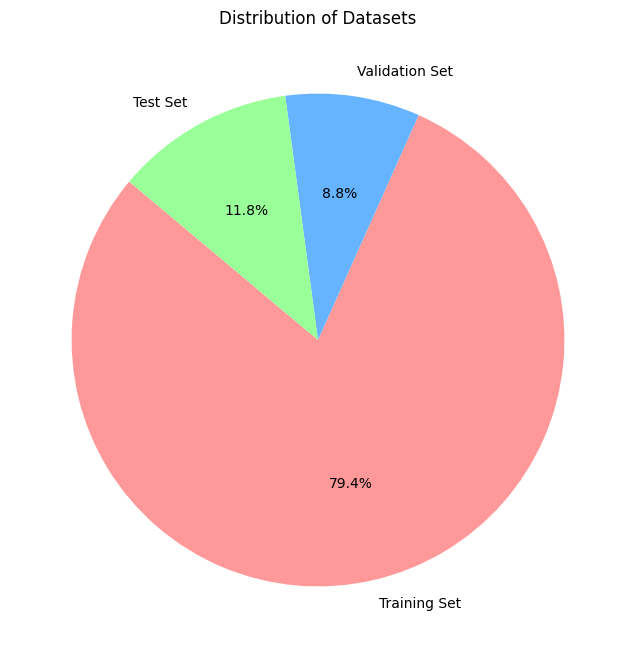

In [ ]:
import matplotlib.pyplot as plt

# Sizes of each dataset
sizes = [len(train_ds), len(validation_ds), len(test_ds)]
labels = ['Training Set', 'Validation Set', 'Test Set']

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Datasets')
plt.show()


In [ ]:
# Visualize the Image and Label Batches from TensorFlow Dataset

for audio_batch, label_batch in train_ds.take(1):
    print(audio_batch.numpy()[0].shape)
    print(audio_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    audio = librosa.feature.inverse.mfcc_to_audio(audio_batch.numpy())

    # Plot the reconstructed audio waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio)
    plt.show()

In [ ]:
# Overview of Training Dataset Structure and Specifications
train_ds

In [ ]:
# Building an Optimized Data Pipeline for Enhanced Performance

# Training Dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Testing Dataset
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

### **Model Building & Training**

In [ ]:
# Define the Parameters of Input_shape, Channel and Target

mfcc_features = 40    # Extracted features from Audio
channel = 1           # Mono Channel
target = 114          # Output Classes

input_shape = (mfcc_features, channel)
input_shape

In [ ]:
# Build a CNN Model Architecture

model = keras.Sequential([

            # Input Layer
            keras.layers.Input(shape=input_shape),

            # 1st Conv Layer
            keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 2nd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 3rd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # Flatten and Convert into 1-Dimentional Vector
            keras.layers.Flatten(),

            # 1st Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # 2nd Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # Output Layer
            keras.layers.Dense(units=target, activation='softmax')
        ])

model

In [ ]:
# Display the Model Summary

model.build(input_shape)
model.summary()

In [ ]:
# Compiling the Model with Optimizer, Loss, and Metrics

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model

In [ ]:
# Model Training with Training_Dataset and Evaluated with Validation_Dataset

history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=300,
                    verbose=1,
                    validation_data = validation_ds)
history

In [ ]:
# Evaluating Model Performance on Test Dataset
model.evaluate(test_ds)

In [ ]:
# Accessing Training History Parameters
history.params

In [ ]:
# Accessing Keys of Training History
history.history.keys()

In [ ]:
# Extracting Accuracy Metrics from Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting Loss Metrics from Training History

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
len(acc), len(val_acc), len(loss), len(val_loss)

In [ ]:
# Save the Model
model.save('/content/Birdmodel.h5')

In [ ]:
import tensorflow as tf

# Load the .h5 model
model = tf.keras.models.load_model('Birdmodel.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted .tflite model
with open('/content/Birdmodellite.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully converted and saved as Birdmodellite.tflite")


In [ ]:
# Visualize the Acuuracy & Loss using Plots

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

### **Model Inference**

In [ ]:
def prediction(audio_file):

    # Load the Prediction JSON File to Predict Target_Label
    with open('/content/prediction.json', mode='r') as f:
        prediction_dict = json.load(f)

    # Extract the Audio_Signal and Sample_Rate from Input Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Reshape MFCC features to match the expected input shape for Conv1D both batch & feature dimension
    mfccs_features = np.expand_dims(mfccs_features, axis=0)
    mfccs_features = np.expand_dims(mfccs_features, axis=2)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    # Load the Model and Prediction
    model = tf.keras.models.load_model('/content/model.h5')
    prediction = model.predict(mfccs_tensors)

    # Find the Maximum Probability Value
    target_label = np.argmax(prediction)

    # Find the Target_Label Name using Prediction_dict
    predicted_class = prediction_dict[str(target_label)]
    confidence = round(np.max(prediction)*100, 2)

    print(f'Predicted Class : {predicted_class}')
    print(f'Confident : {confidence}%')

In [ ]:
prediction('Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan11.mp3')

In [ ]:
prediction('Voice of Birds/Voice of Birds/Band-tailed Guan_sound/Band-tailed Guan12.mp3')

In [ ]:
prediction('/content/Maleo4.mp3')